# Seaborn Visualization Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titan=pd.read_csv('Database/Titanic training.csv')

In [3]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(titan.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
titan.shape

(891, 12)

## No. of people survived or otherwise

In [6]:
titan.groupby('Survived')[['PassengerId']].count()

,PassengerId
Survived,
0,549
1,342


Here in table PassengerId column shows count of passengers 

## Visual Exploration

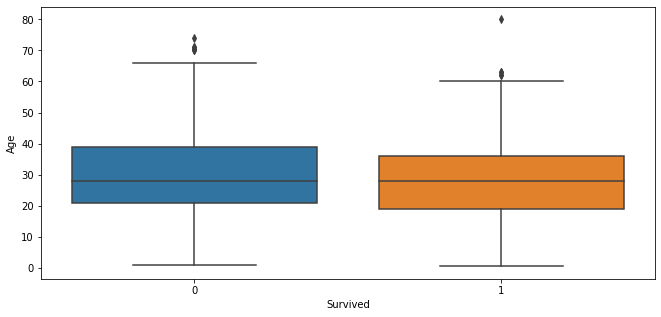

In [8]:
f,ax=plt.subplots(figsize=(11,5))
sns.boxplot(x='Survived',y='Age',data=titan)

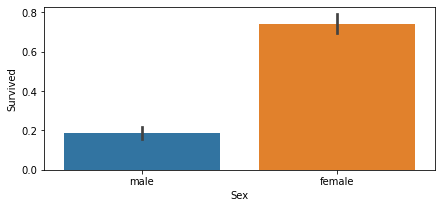

In [9]:
f.ax=plt.subplots(figsize=(7,3))
sns.barplot(x='Sex',y='Survived',data=titan)

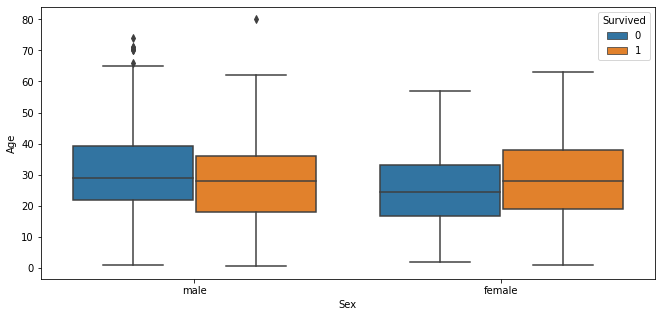

In [10]:
f.ax=plt.subplots(figsize=(11,5))
sns.boxplot(x='Sex',y="Age",hue='Survived',data=titan)

Gives clarity to the above finding that Males have very less chances for age > 60+

Number of female passengers survived is more than male passengers

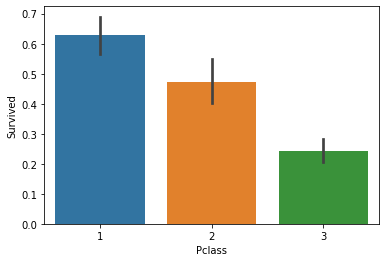

In [11]:
sns.barplot(x="Pclass",y='Survived',data=titan)

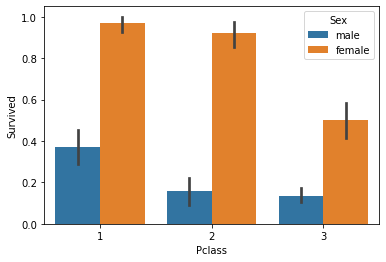

In [12]:
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=titan)

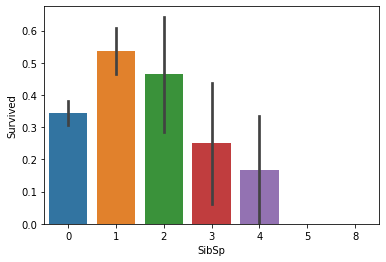

In [13]:
sns.barplot(x='SibSp',y='Survived',data=titan)

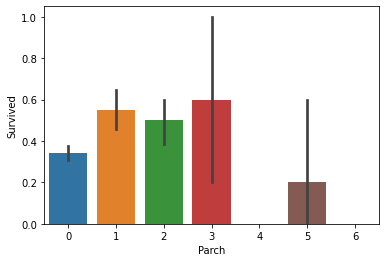

In [14]:
sns.barplot(x="Parch",y='Survived',data=titan)

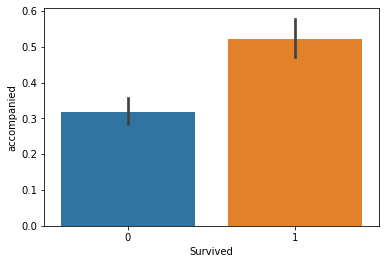

In [15]:
titan['family']=titan['SibSp']+titan['Parch']
titan['accompanied']=titan['family'].apply(lambda x:0 if x==0 else 1)
sns.barplot(x='Survived',y='accompanied', data=titan)

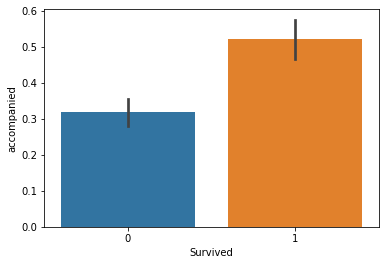

In [16]:
titan.family=titan.SibSp+titan.Parch
titan.accompanied=titan.family.apply(lambda x:0 if x==0 else 1)
sns.barplot(x='Survived',y='accompanied',data=titan)

Those who are occumpanied by a family member (elder or siblings) had high survival rate

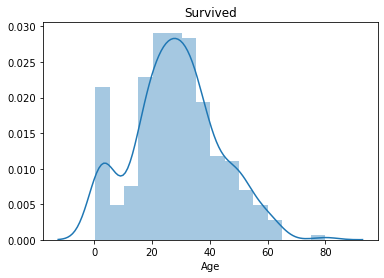

In [17]:
survived=titan.loc[titan.Survived==1,'Age'].dropna()
sns.distplot(survived)
plt.title('Survived');

Passengers aged between 18-38 had high survival rate compared to others

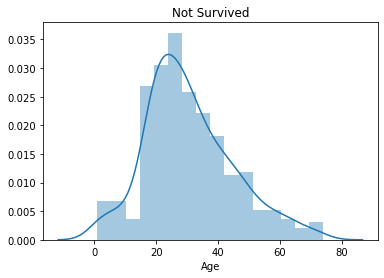

In [18]:
not_survived=titan.loc[titan.Survived==0,'Age'].dropna()
sns.distplot(not_survived)
plt.title('Not Survived');

Infants had high survival rate and elderly passengers above 65+ were less likely to survive as plot is positively skewed

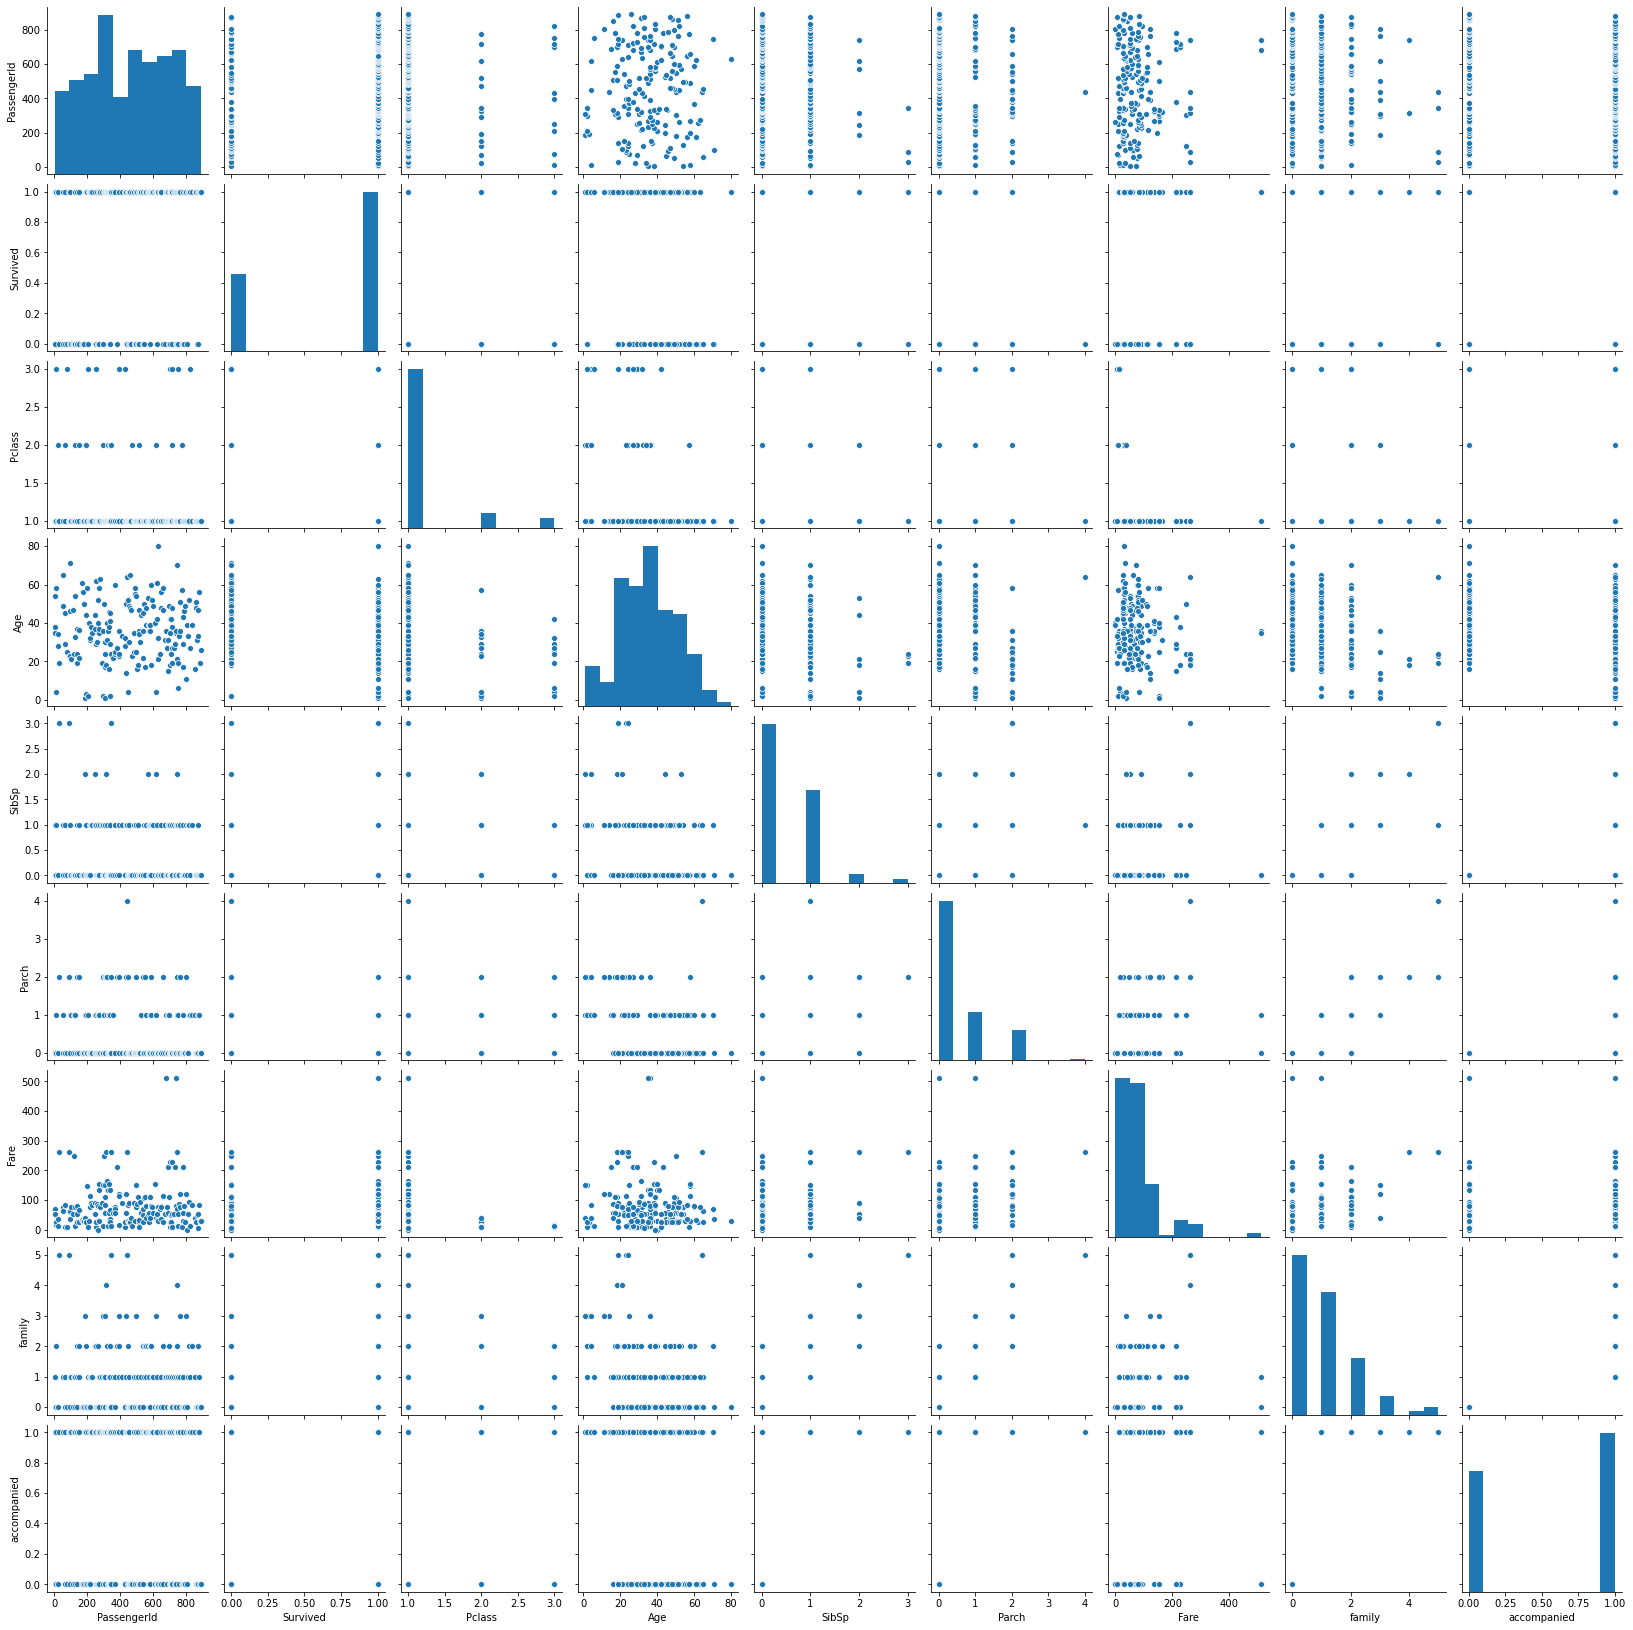

In [19]:
sns.pairplot(titan.dropna())

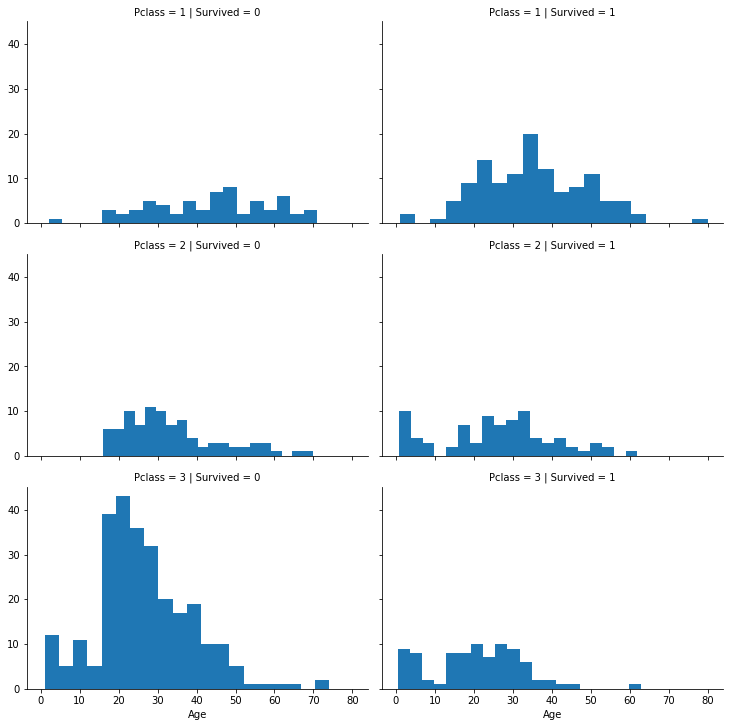

In [20]:
## Pclass Vs Survived
grid=sns.FacetGrid(titan,row='Pclass',col='Survived',height=3.4, aspect=1.5)
grid.map(plt.hist,'Age', alpha=1,bins=20)
grid.add_legend()

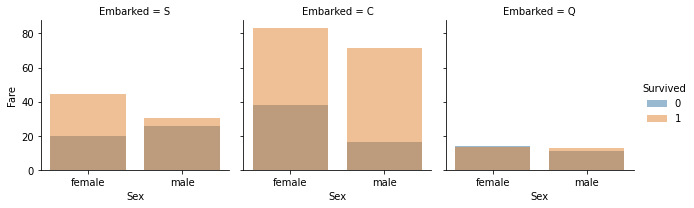

In [31]:
# Embarked vs Sex Survived
grid=sns.FacetGrid(titan,col='Embarked',hue='Survived')
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()


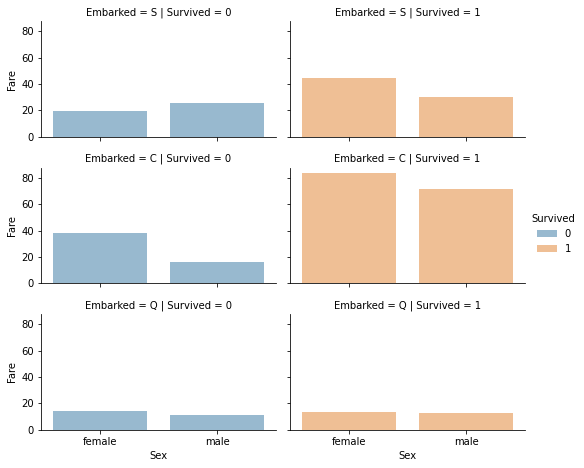

In [32]:
# Embarked vs Sex Survived
grid=sns.FacetGrid(titan,row='Embarked',col='Survived', hue='Survived', size=2.2,aspect=1.7)
grid.map(sns.barplot, 'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

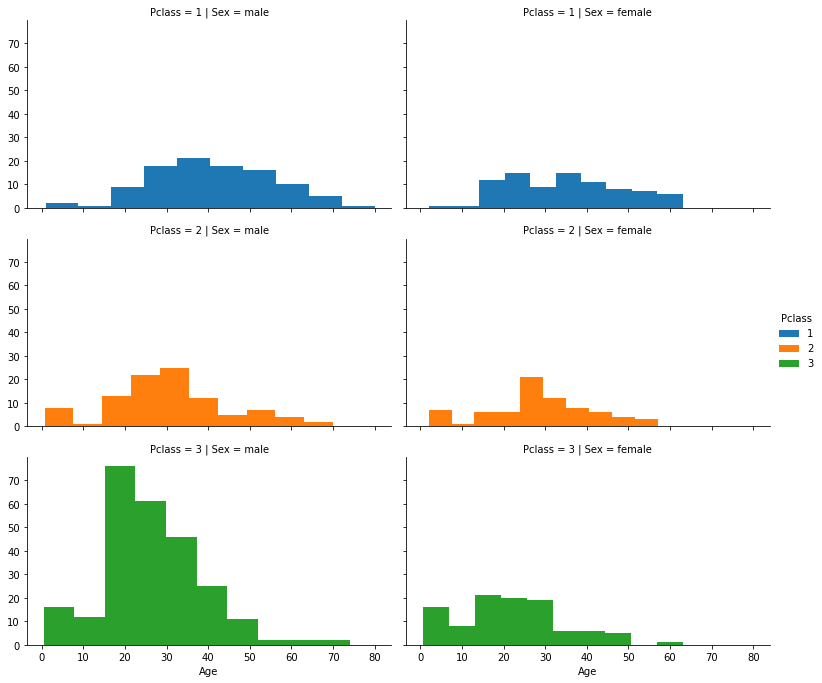

In [23]:
# Passenger Class Vs Sex & Age
grid=sns.FacetGrid(titan,row='Pclass',col='Sex',hue='Pclass',size=3.2,aspect=1.7)
grid.map(plt.hist,'Age',alpha=1,bins=10)
grid.add_legend()

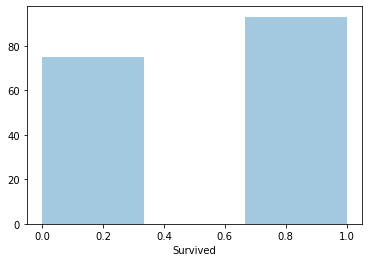

In [34]:
sns.distplot(titan[titan.Embarked=='C']['Survived'],bins=3,kde=False)

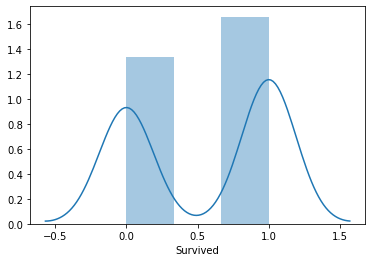

In [35]:
sns.distplot(titan[titan.Embarked=='C']['Survived'],bins=3,kde=True)

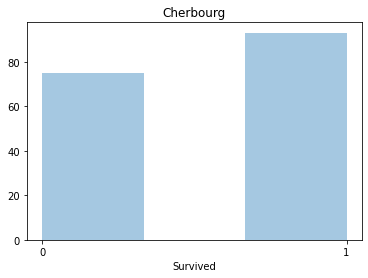

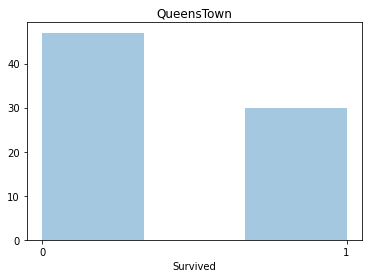

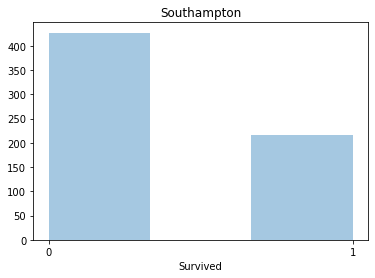

In [36]:
sns.distplot(titan[titan.Embarked=='C']['Survived'],bins=3,kde=False)
plt.title('Cherbourg')
plt.xticks([0,1])
plt.show()
sns.distplot(titan[titan.Embarked=='Q']['Survived'],bins=3,kde=False)
plt.title('QueensTown')
plt.xticks([0,1])
plt.show()
sns.distplot(titan[titan.Embarked=='S']['Survived'],bins=3,kde=False)
plt.title('Southampton')
plt.xticks([0,1])
plt.show()

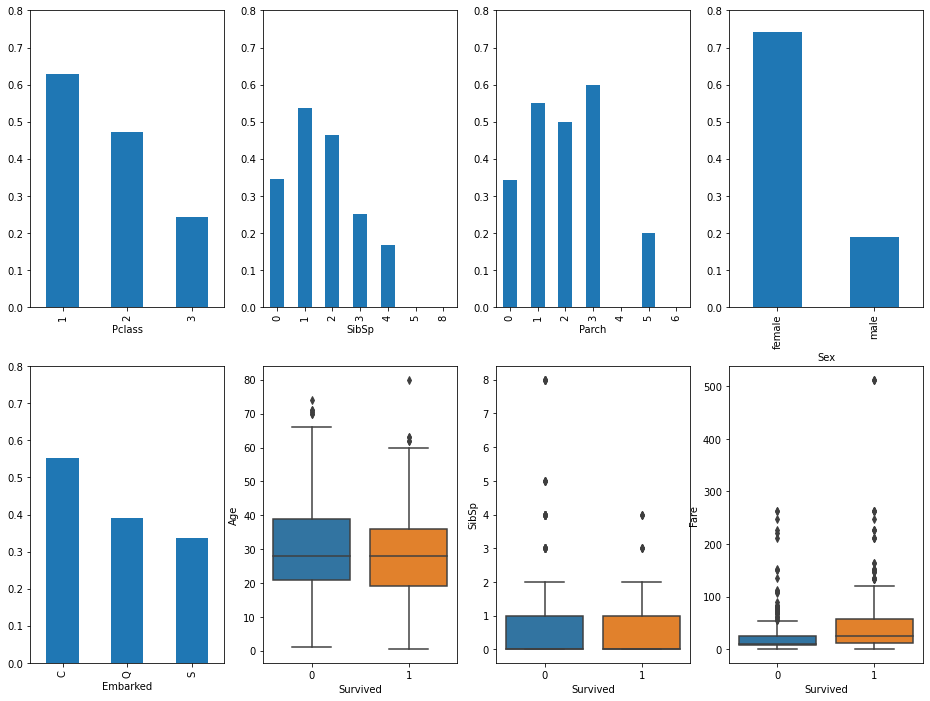

In [37]:
f.ax=plt.subplots(figsize=(16,12))
plt.subplot(2,4,1)
titan.groupby('Pclass')['Survived'].mean().plot(kind='bar',ylim=[0,0.8])
plt.subplot(2,4,2)
titan.groupby('SibSp')['Survived'].mean().plot(kind='bar',ylim=[0,0.8])
plt.subplot(2,4,3)
titan.groupby('Parch')['Survived'].mean().plot(kind='bar',ylim=[0,0.8])
plt.subplot(2,4,4)
titan.groupby('Sex')['Survived'].mean().plot(kind='bar',ylim=[0,0.8])
plt.subplot(2,4,5)
titan.groupby('Embarked')['Survived'].mean().plot(kind='bar',ylim=[0,0.8])
plt.subplot(2,4,6)
sns.boxplot(x='Survived',y='Age',data=titan)
plt.subplot(2,4,7)
sns.boxplot(x='Survived',y='SibSp',data=titan)
plt.subplot(2,4,8)
sns.boxplot(x='Survived',y='Fare',data=titan)